In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from pathlib import Path
from config.path_config import TEST_DATA_PATH , TRAIN_DATA_PATH, BASE_DIR


In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
print(f"base directory: {BASE_DIR}")
print(f"train data path: {TRAIN_DATA_PATH}")
print(f"test data path: {TEST_DATA_PATH}")

base directory: D:\Course-work\001\project_1\ml-ops-project_1
train data path: D:\Course-work\001\project_1\ml-ops-project_1\artifacts\raw\train_data.csv
test data path: D:\Course-work\001\project_1\ml-ops-project_1\artifacts\raw\test_data.csv


In [4]:
df = pd.read_csv(Path(TRAIN_DATA_PATH))
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [5]:
# checking colums
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [6]:
# remove unused columns
df.drop(columns=['Booking_ID'], inplace=True)

df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [7]:
df.shape

(29020, 18)

In [8]:
# ckecking missing values
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
# checking duplicate values
df.duplicated().sum()

np.int64(7661)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.shape

(21359, 18)

In [13]:
df.no_of_adults.unique()

array([2, 1, 3, 0, 4])

### Describe Data Distributuin of data set using ```plotly```

>- If you don't have use blow for install library

```bash
pip install plotly
```

>- Comprehensive Dashboard : Get overview

In [14]:
# describe data summary usiing bar plot
# create plot gid in each cloum value label and it count as a sub plot

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a figure with subplots
fig = make_subplots(
    rows=5, cols=4,
    subplot_titles=df.columns,
    vertical_spacing=0.1,
    horizontal_spacing=0.1
)

# Plot each column
for i, col in enumerate(df.columns):
    row = (i // 4) + 1
    col_num = (i % 4) + 1
    
    # Get value counts for the column
    value_counts = df[col].value_counts()
    
    # Limit to top 10 for columns with many unique values
    if len(value_counts) > 10:
        value_counts = value_counts.head(10)
    
    # Create bar chart
    fig.add_trace(
        go.Bar(
            x=value_counts.index.astype(str),
            y=value_counts.values,
            name=col,
            showlegend=False
        ),
        row=row, col=col_num
    )
    
    # Update axes for better readability
    fig.update_xaxes(tickangle=45, row=row, col=col_num)
    fig.update_yaxes(title_text="Count", row=row, col=col_num)

# Update layout
fig.update_layout(
    height=1200,
    width=1400,
    title_text="Distribution of Values for Each Column",
    showlegend=False
)

fig.show()


    

>- In this data set is ```imbalance``` dataset. Because of this ```booking_status``` clolumn visulise imbalese data. So We used Data balacing techniques for balance the data set before starting model training

In [15]:
# divide data set into categorical and numerical columns
cat_clos = [
    "type_of_meal_plan",
    "required_car_parking_space",
    "room_type_reserved",
    "market_segment_type",
    "repeated_guest",
    "booking_status"
] 

num_cols = [
    "no_of_adults",
    "no_of_children",
    "no_of_weekend_nights",
    "no_of_week_nights",
    "lead_time",
    "arrival_year",
    "arrival_month",
    "arrival_date",
    "no_of_previous_cancellations",
    "no_of_previous_bookings_not_canceled",
    "avg_price_per_room",
    "no_of_special_requests"
]

In [16]:
print(f"Categorical columns: {len(cat_clos)}")
print(f"Numerical columns: {len(num_cols)}")



Categorical columns: 6
Numerical columns: 12


## Data Analysis

In [17]:
# get dataset copy
"""_summary_
    this data copy is used for further analysis and preprocessing. 
    this won't affect the original dataframe.
"""
data = df.copy()

data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


##### Univariate Analysis

>- Univariant analysis of numerical columns

In [18]:
# represet numericl columns  distribution

def num_plot_dist(data:pd.DataFrame , num_features:list):
    """_summary_
        this function plot numerical features distribution using histplot
    Args:
        dat (Dataframe): _description_
        num_features (list): _description_
    """
    fig, axes = plt.subplots(nrows=len(num_features), ncols=2, figsize=(15, 5*len(num_features)))
    
    if len(num_features) == 1:
        axes = np.array([axes])
        
    for i, coloumn in enumerate(num_features):
        # Histogram
        sns.histplot(
            data=data, 
            x=coloumn, 
            ax=axes[i,0], 
            kde=True, 
            palette='tab10'
        )
        # set title
        axes[i,0].set_title(f"Histogram of {coloumn}")
        
        # Boxplot
        sns.boxplot(
            data=data,
            x=coloumn,
            ax=axes[i,1],
            palette='Blues'
        )
        # set title
        axes[i,1].set_title(f"Boxplot of {coloumn}")
    
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

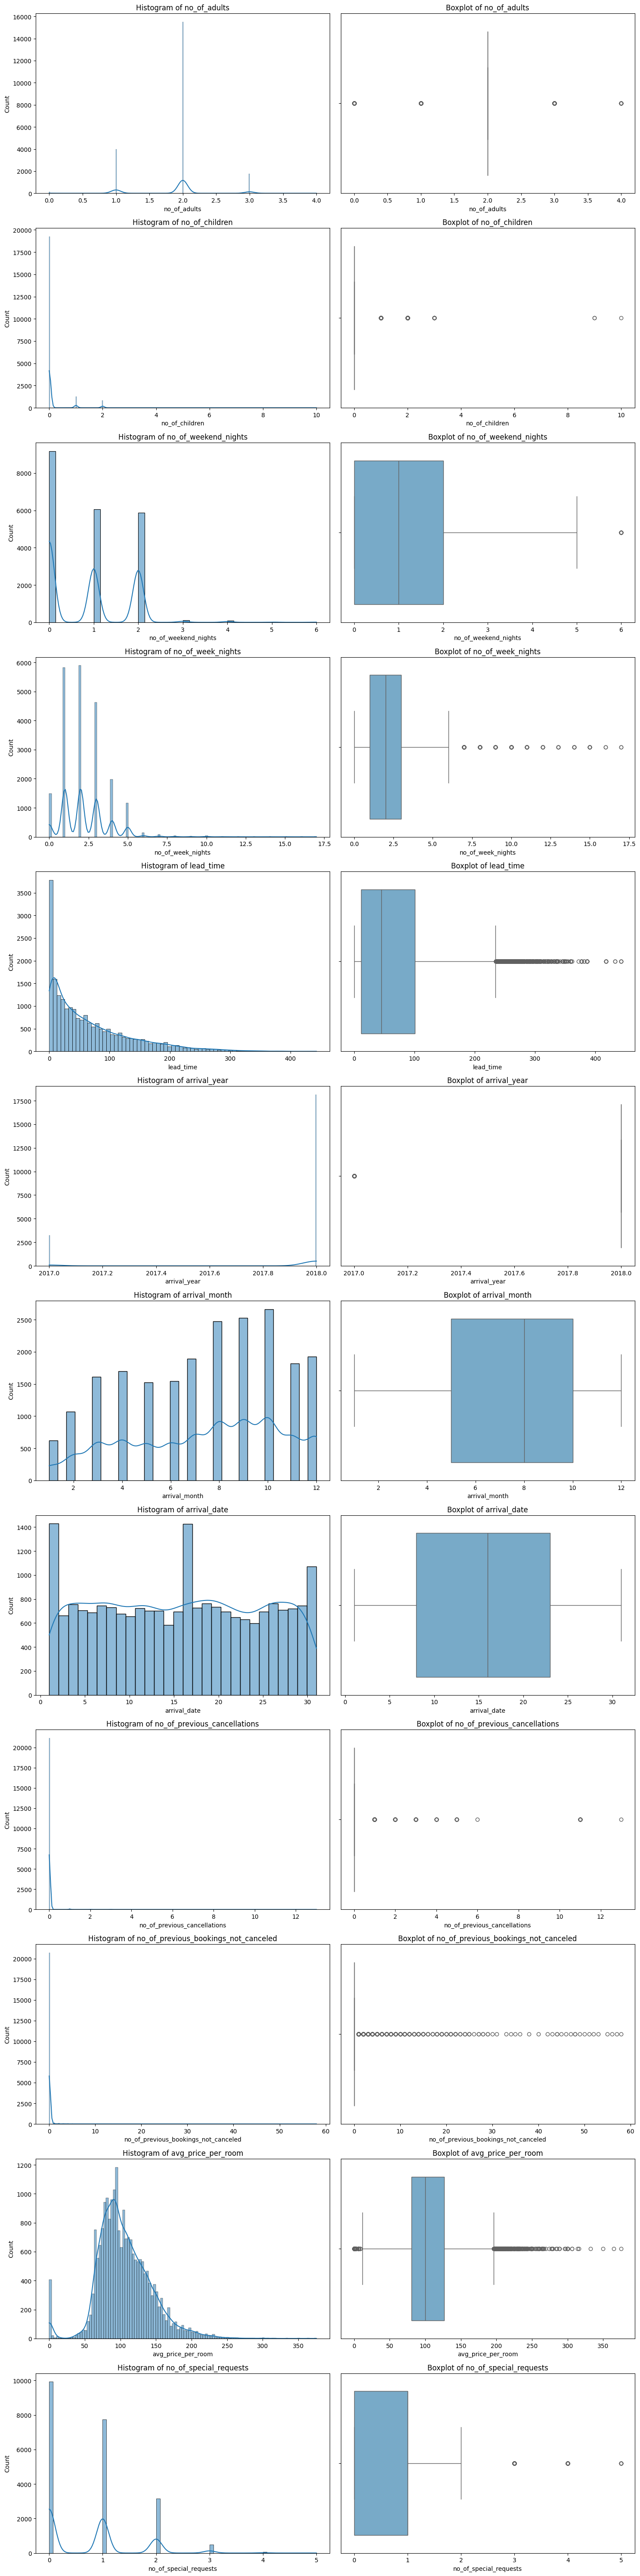

In [19]:
# Call the function to plot numerical distributions
num_plot_dist(data=data, num_features=num_cols)

>- Univariant analysis fo categorical colums

In [20]:
# represet categorical columns distribution

def cat_plot_dist(data:pd.DataFrame , cat_features:list):
    """__summary__
        this function plot categorical features distribution using countplot
        
    Args:
        data (pd.DataFrame): _description_
        cat_features (list): _description_
    """
    
    fig, axes = plt.subplots(nrows=len(cat_features)//3, ncols=3, figsize=(20, 5*len(cat_features)//3))
    
    for i, col in enumerate(cat_features):
        row = i // 3
        col_num = i % 3
        
        sns.countplot(
            data=data,
            x=col,
            ax=axes[row, col_num],
            palette='Set2'
        )
        
        axes[row, col_num].set_title(f"Countplot of {col}")
        axes[row, col_num].tick_params(axis='x', rotation=45)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

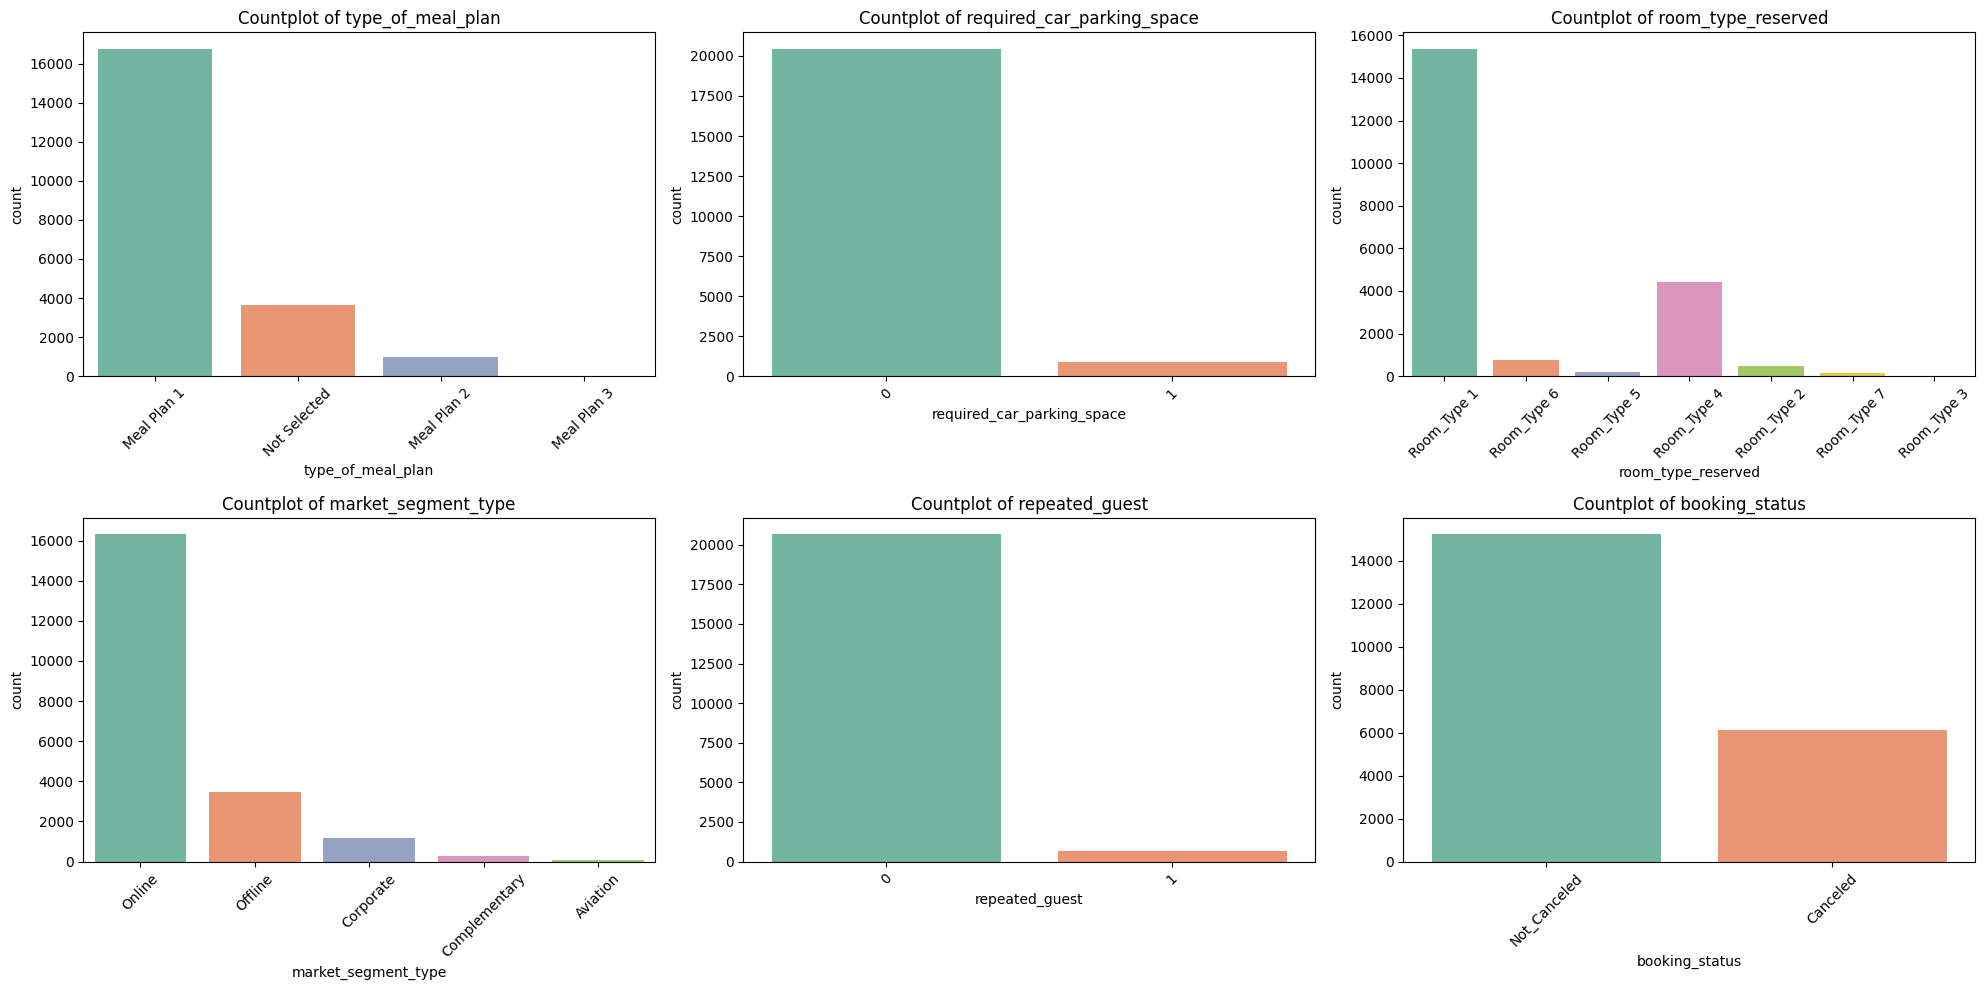

In [21]:
# Call the function to plot categorical distributions
cat_plot_dist(data=data, cat_features=cat_clos)

##### Bivariate Analysis

In [22]:
# Bivariate Analysis for numerical features

def bivariate_num_plot(data:pd.DataFrame, num_features:list, target_col:str):
    """_summary_
        this function plot bivariate analysis for numerical features using scatter plot and box plot
    Args:
        data (pd.DataFrame): dataset
        num_features (list): numerical features in dataset
        target_col (str): target column in dataset
    """
    num_plots = len(num_features)
    num_raw = (num_plots + 1)//2
    
    fig, axes = plt.subplots(
        nrows=num_raw,
        ncols=2,
        figsize=(15, 5*num_raw)
    )
    axes = axes.flatten()
    
    for i, col in enumerate(num_features):
        sns.boxplot(
            data=data,
            x=target_col,
            y=col,
            ax=axes[i],
            palette='Blues'
        )
        axes[i].set_title(f"Boxenplot of {col} vs {target_col}")
        
    plt.tight_layout()
    plt.show()

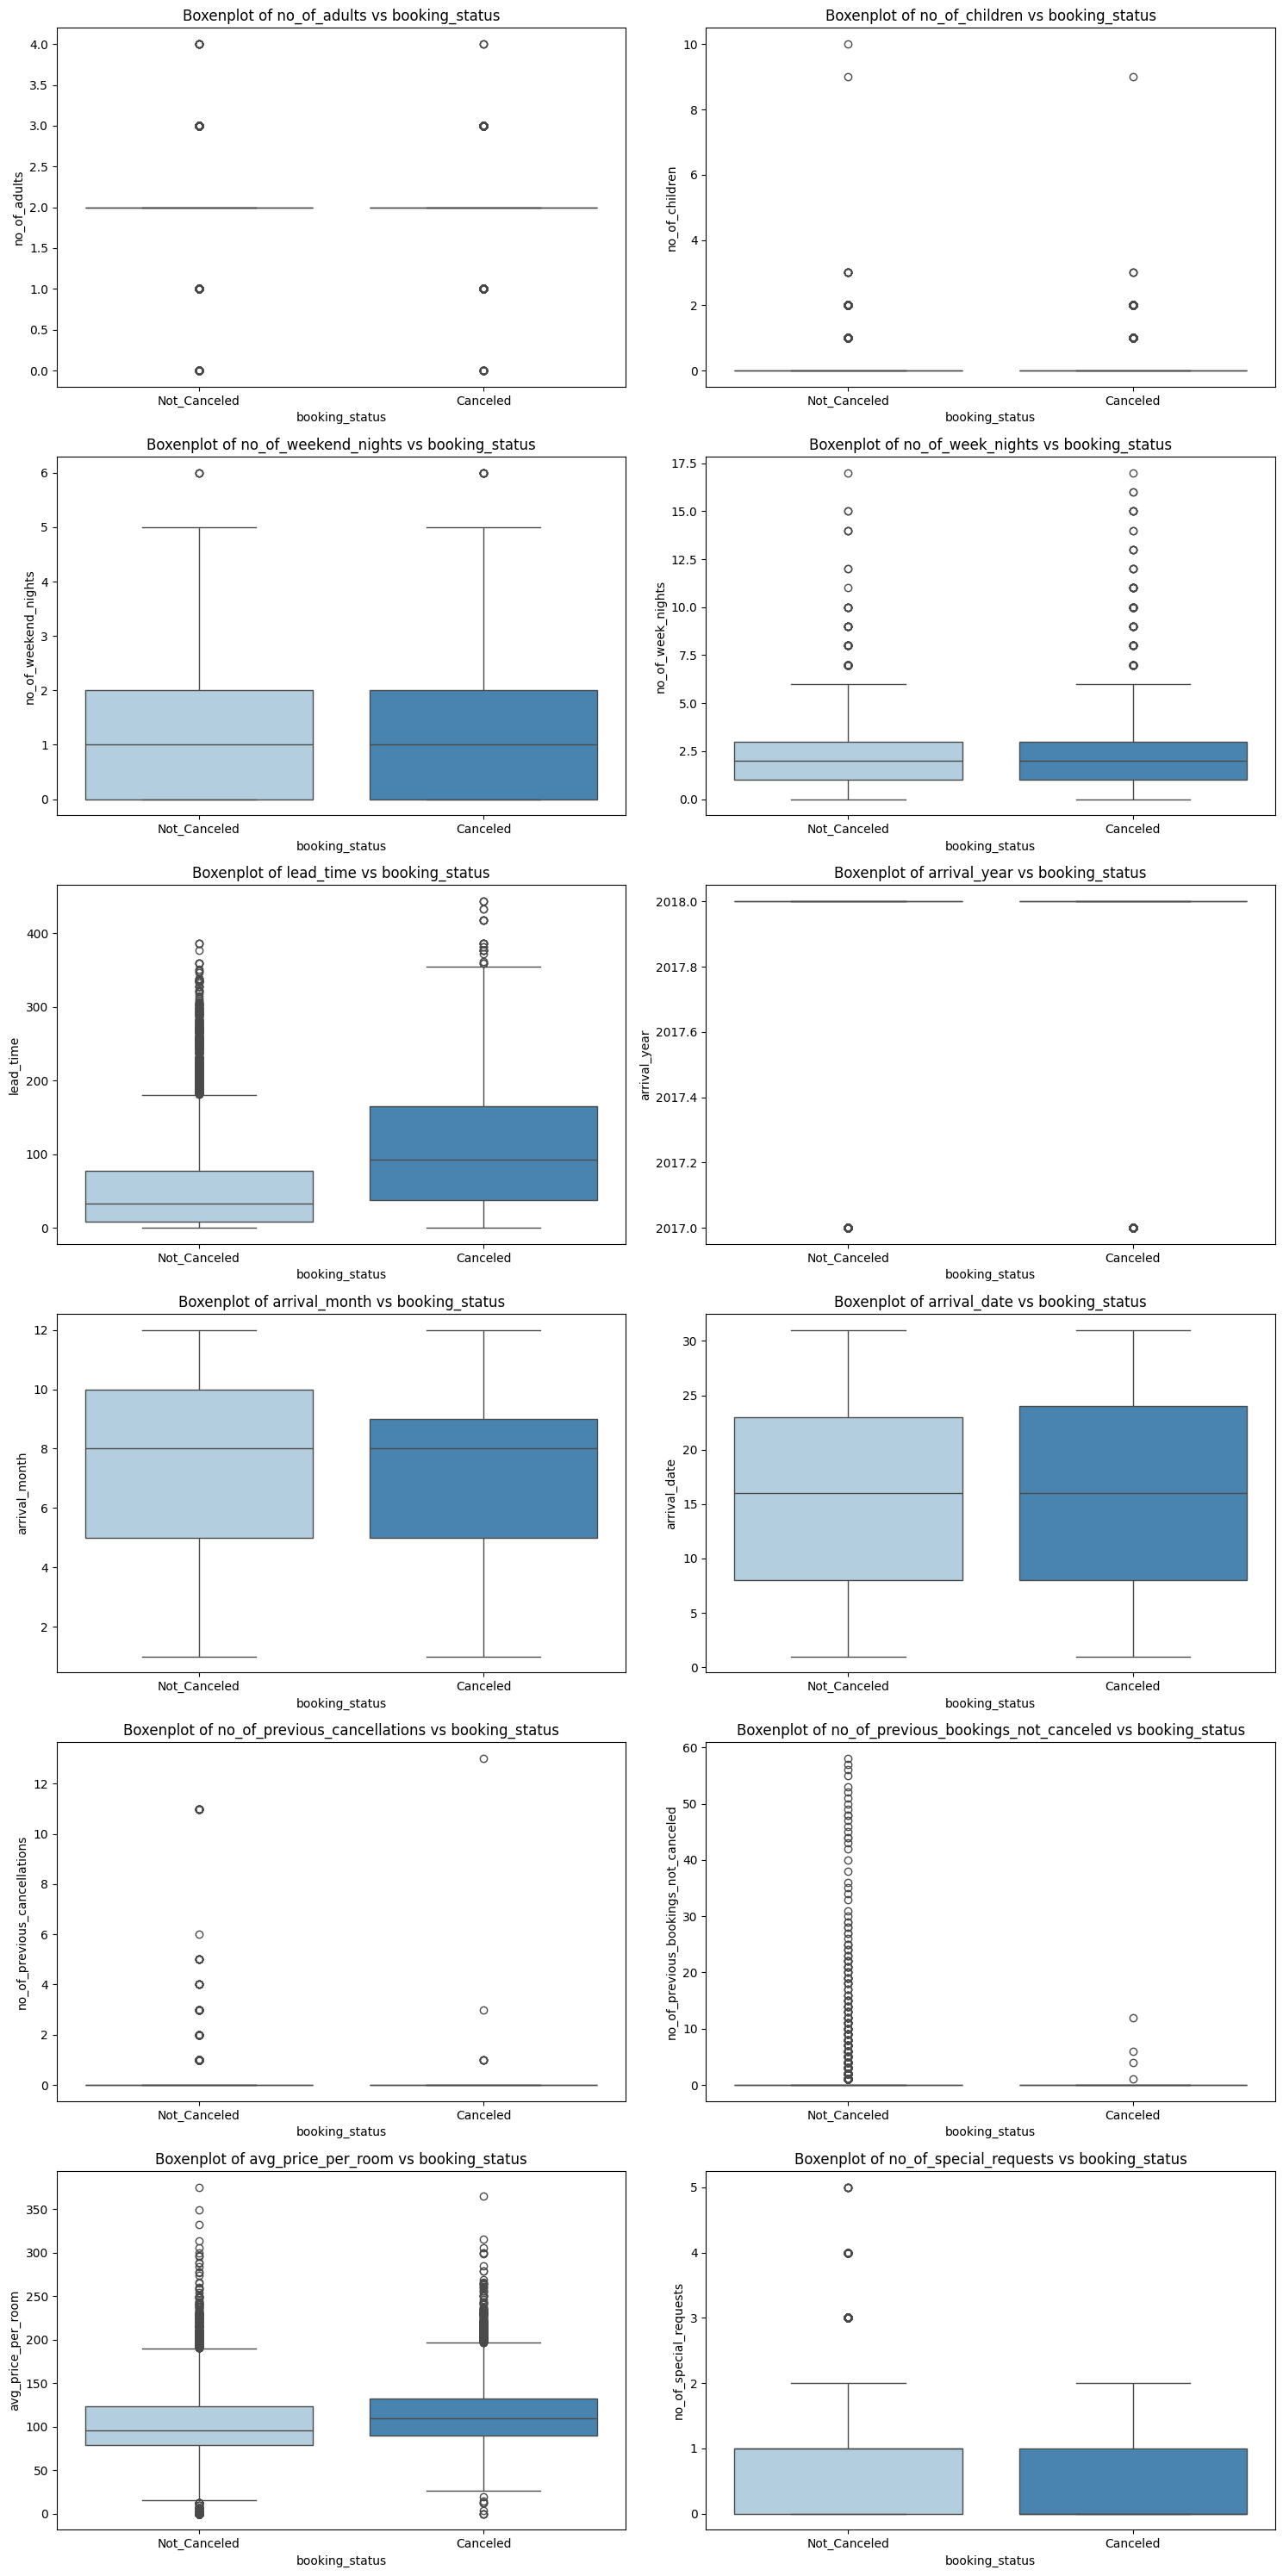

In [23]:
# Call the function to plot numerical distributions
bivariate_num_plot(data=data, num_features=num_cols, target_col='booking_status')

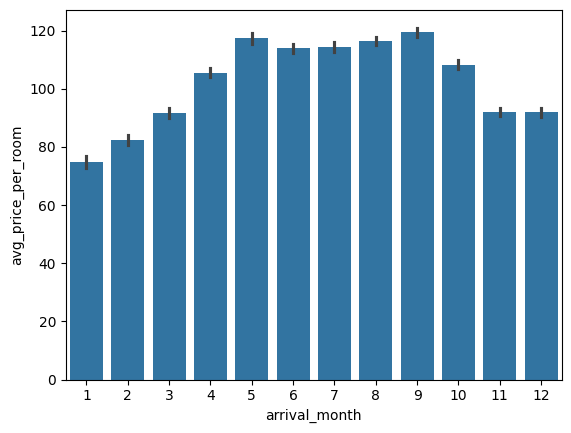

In [24]:
sns.barplot(
    data=data,
    x='arrival_month',
    y='avg_price_per_room',
)
plt.show()

In [25]:
#  Bivariante analysis for categorical coloumns

def bivariate_cat_plot(data:pd.DataFrame, cat_features:list, target_col:str):
    """_summary_
        this function plot bivariate analysis for categorical features using count plot
    Args:
        data (pd.DataFrame): dataset
        cat_features (list): categorical features in dataset
        target_col (str): target column in dataset
    """
    num_plots = len(cat_features)
    num_raw = (num_plots + 1)//2
    
    fig, axes = plt.subplots(
        nrows=num_raw,
        ncols=2,
        figsize=(15, 5*num_raw)
    )
    axes = axes.flatten()
    
    for i, col in enumerate(cat_features):
        sns.countplot(
            data=data,
            x=col,
            hue=target_col,
            ax=axes[i],
            palette='Set2'
        )
        axes[i].set_title(f"Countplot of {col} vs {target_col}")
        axes[i].tick_params(axis='x', rotation=90)
        
    plt.tight_layout()
    plt.show()

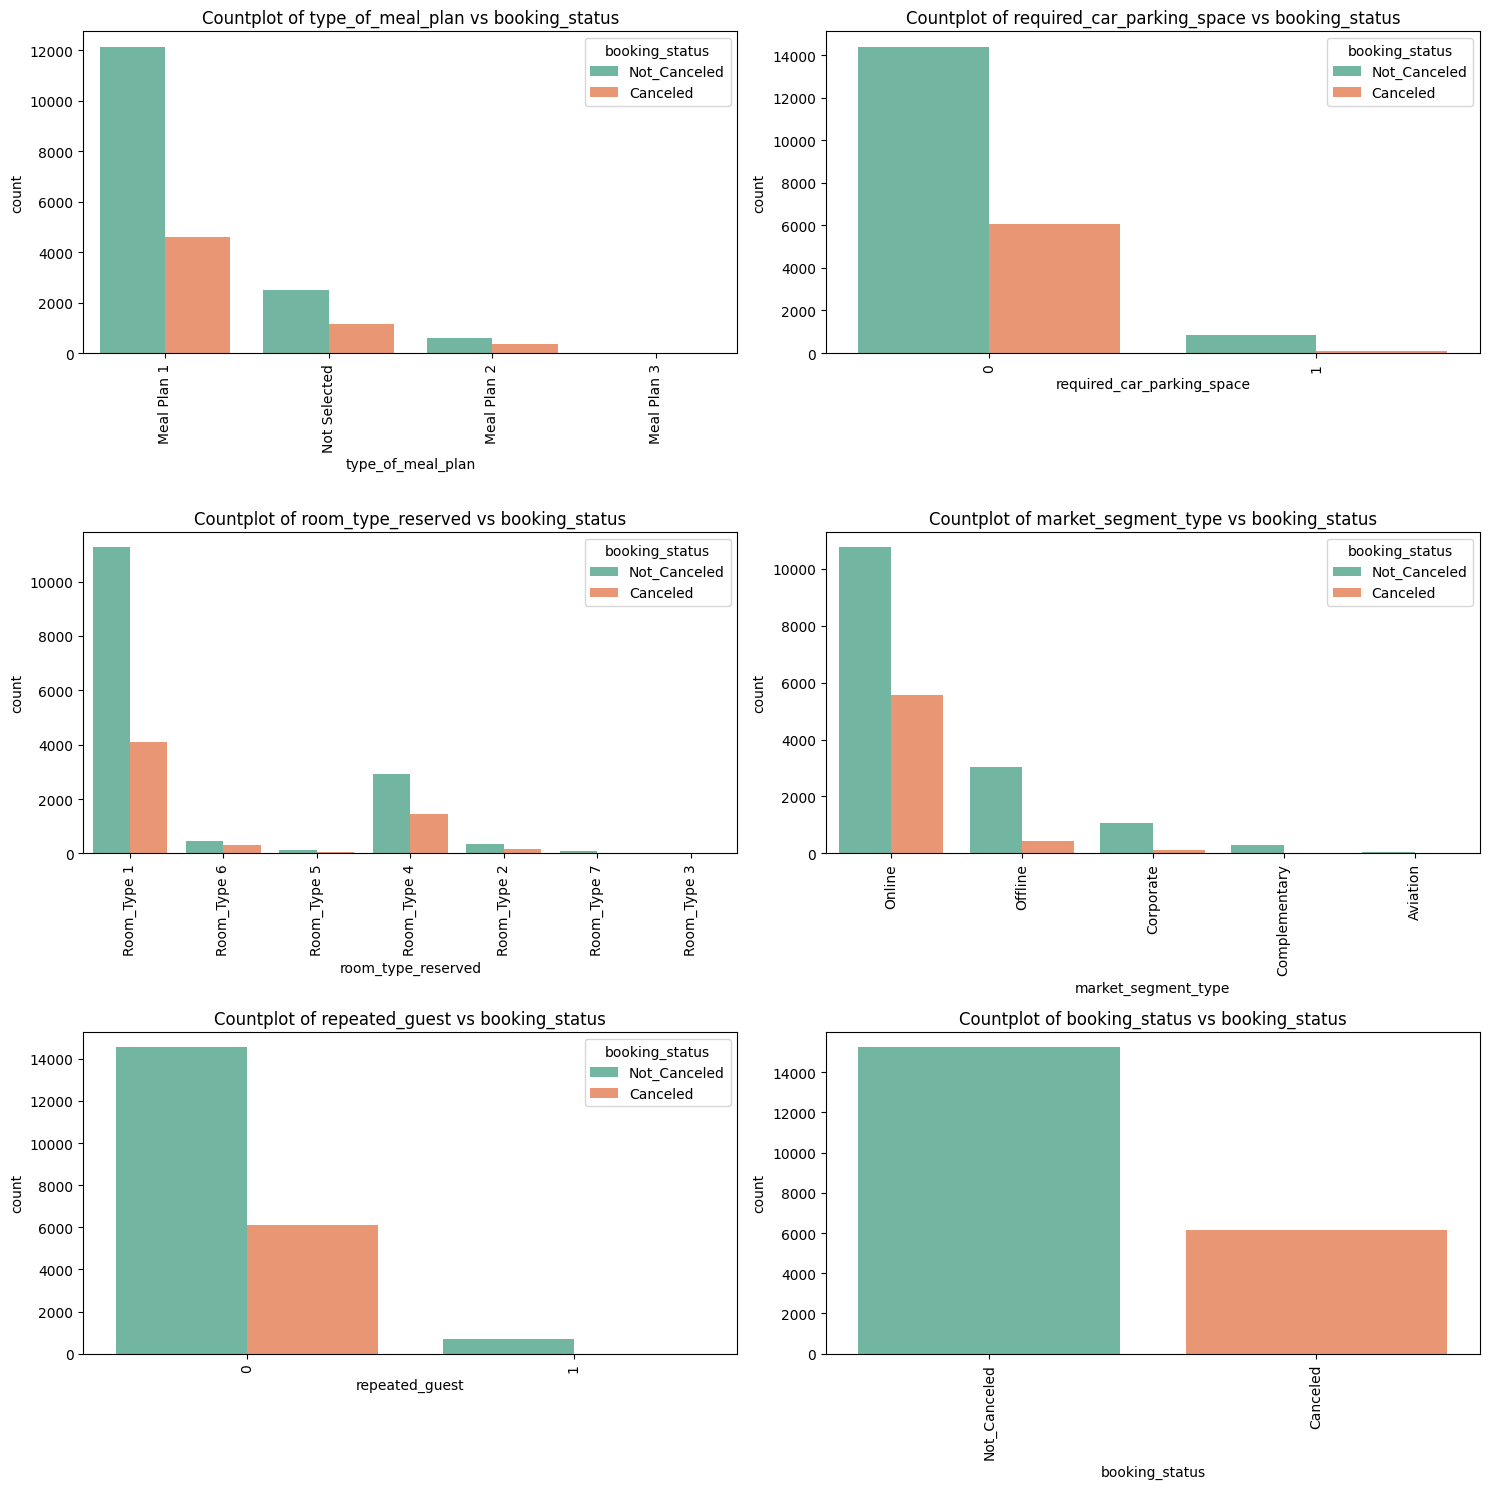

In [26]:
# Call the function to plot categorical distributions
bivariate_cat_plot(data=data, cat_features=cat_clos, target_col='booking_status')

## Data Processing

In [27]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [29]:
# --------- Label Encoding  
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

store_mappings = {}

for col in cat_clos:
    data[col] = encoder.fit_transform(data[col])
    
    # mapping values
    store_mappings[col] = {lable:code for lable, code in zip(encoder.classes_, encoder.transform(encoder.classes_))}
    

In [30]:
store_mappings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [31]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

>- Now we find ```Multicollinerity``` : Tis means onne cloumn in data set  to highly related another coloumn in datase

>- ```Mulricollinerity``` is negetivly effect in ML model implementation. So we should avoide this

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(data=data)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [34]:
vif_data

,Feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


>- So this data set all coloums have very small ```VIF``` value. So this data set doesn't have ```Mulicollinerity```

In [35]:
# visualize corelation matrix

corr = data.corr()
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


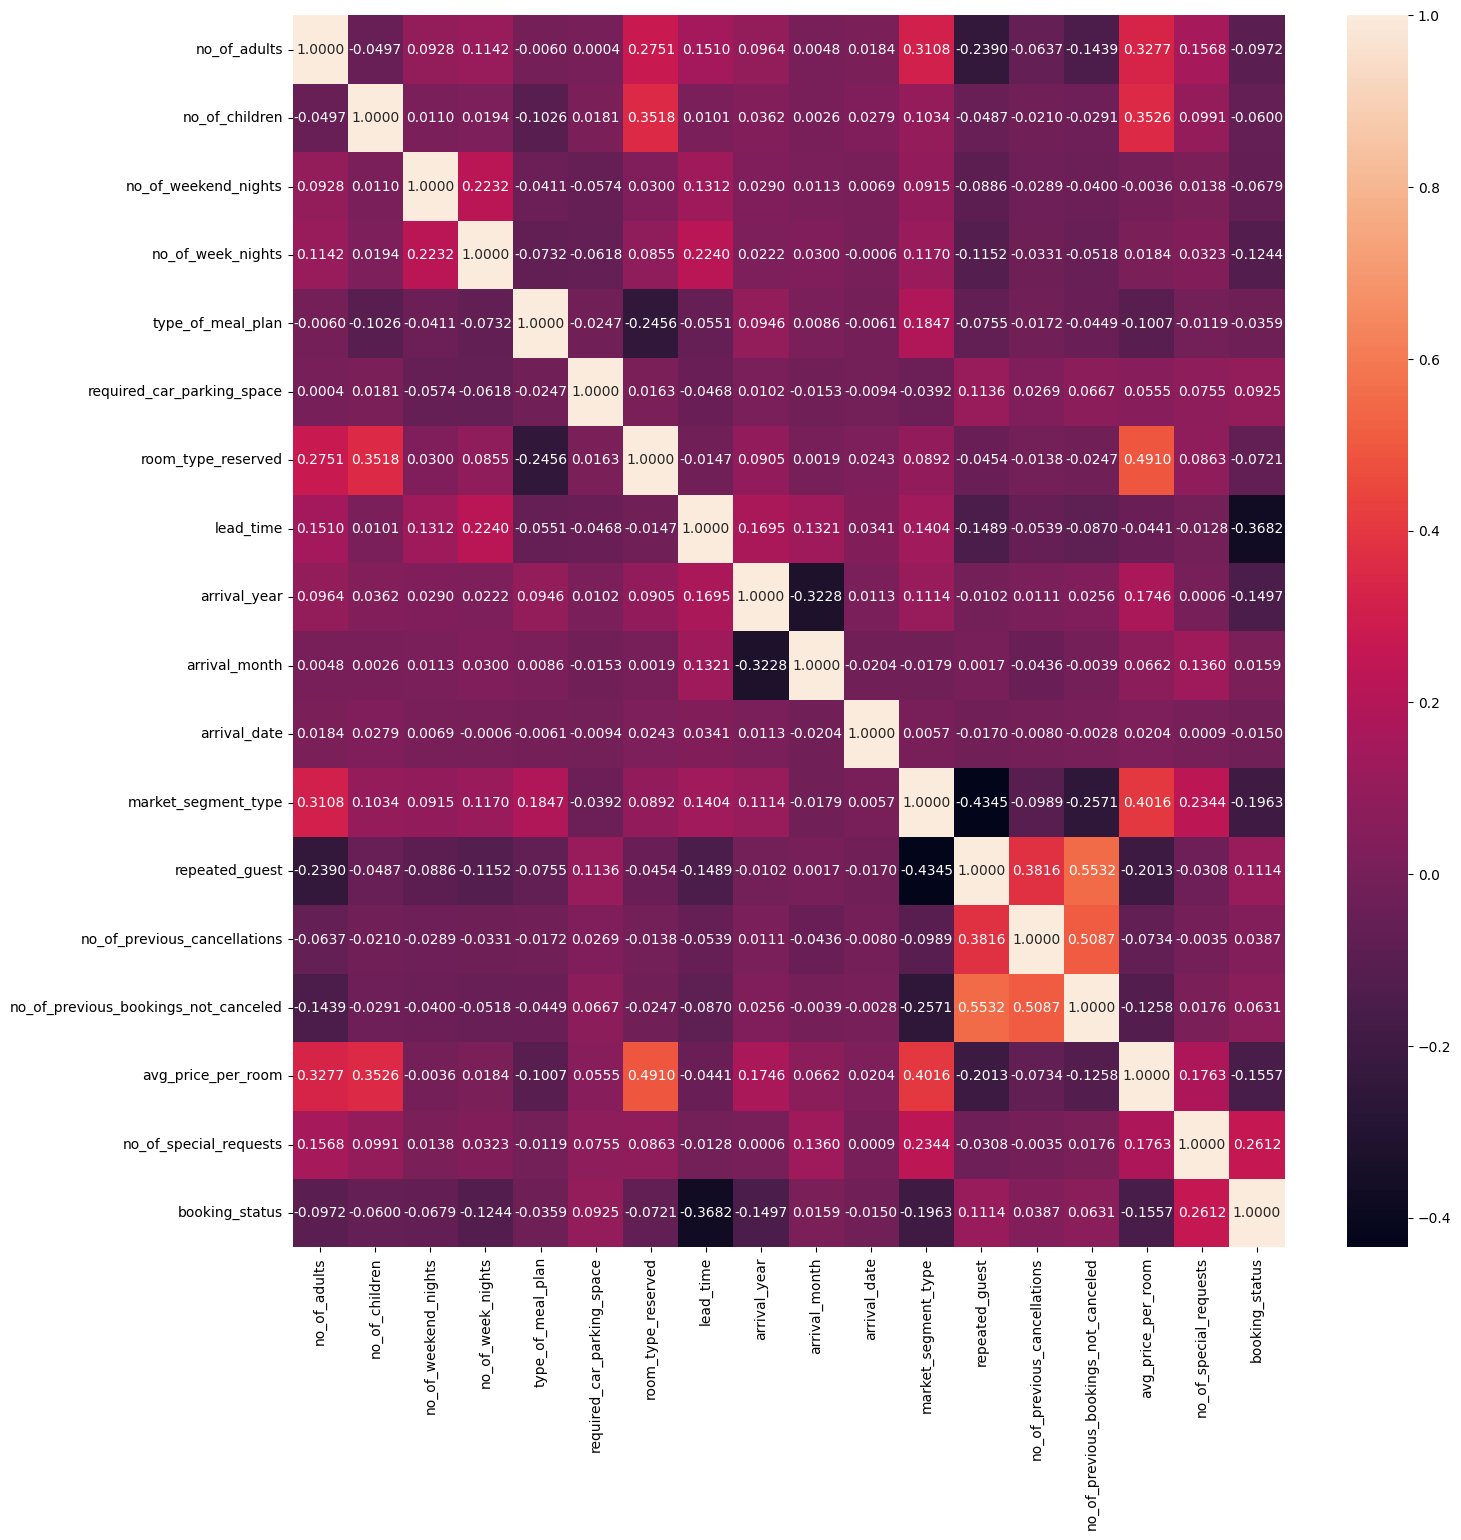

In [36]:
plt.figure(figsize=(16,16))
sns.heatmap(
    data=corr,
    annot=True,
    fmt=".4f",
)
plt.show()

>- Check Skewness of dataset

In [37]:
# Skewness
skewness = data.skew()

skewness 

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

>- This data set some festures goes ```Nagatively Skew``` and some featurs ```Positively Skew```. So fix that issue

In [38]:
# Use log transformation to reduce skewness in numerical features
for col in data.columns:
    if skewness[col] > 5:
        data[col] = np.log1p(data[col])  # log1p is used to handle zero values

In [39]:
skewness = data.skew()
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

>- Imbalance data

In [40]:
data['booking_status'].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [41]:
X = data.drop(columns=['booking_status'])
Y = data['booking_status']

In [42]:
X.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [43]:
Y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [44]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)
X_resampled.shape, Y_resampled.shape

((30462, 17), (30462,))

In [45]:
Y_resampled.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [46]:
balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data['booking_status'] = Y_resampled

In [47]:
balanced_data.shape

(30462, 18)

In [48]:
data = balanced_data.copy()
data.shape

(30462, 18)

## Feature Selection

In [49]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop(columns=['booking_status'])
Y = data['booking_status']



In [50]:
model = RandomForestClassifier(random_state=42)
model.fit(X,Y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
feature_importances = model.feature_importances_
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [52]:
most_effect_features = feature_importances_df.sort_values(by="Importance", ascending=False)
most_effect_features

,Feature,Importance
7,lead_time,0.260226
16,no_of_special_requests,0.183688
15,avg_price_per_room,0.150109
9,arrival_month,0.085296
10,arrival_date,0.084464
11,market_segment_type,0.057997
3,no_of_week_nights,0.044419
2,no_of_weekend_nights,0.030316
4,type_of_meal_plan,0.020648
6,room_type_reserved,0.020059


In [53]:
top_features = most_effect_features['Feature'].head(10).values
top_10_features_with_data = data[top_features.tolist() + ['booking_status']]
top_10_features_with_data.shape

(30462, 11)

In [54]:
data = top_10_features_with_data.copy()
data.shape

(30462, 11)

## Model Selection

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import  LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [56]:
X = data.drop(columns=['booking_status'])
Y = data['booking_status']

X_tgrain, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [57]:
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradiant Boosting": GradientBoostingClassifier(random_state=42),
    "Ada Boosting": AdaBoostClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Mechine": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Navie Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XG Boost": XGBClassifier(random_state=42),
    "Light Gradiant Boost Machine": LGBMClassifier(random_state=42)
}

In [67]:
results = []

In [68]:
for model_name, model_clasifier in classifiers.items():
    model_clasifier.fit(X_tgrain,Y_train)
    
    Y_pred = model_clasifier.predict(X_test)
    
    accuracy = accuracy_score(y_pred=Y_pred, y_true=Y_test)
    precision = precision_score(y_pred=Y_pred, y_true=Y_test)
    recall = recall_score(y_pred=Y_pred, y_true=Y_test)
    f1 = f1_score(y_pred=Y_pred, y_true=Y_test)
    
    # store metrics
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

In [70]:
metrics_df = pd.DataFrame(results)
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.891679,0.892508,0.892508,0.892508
1,Gradiant Boosting,0.837190,0.821473,0.864821,0.842590
2,Ada Boosting,0.804202,0.821294,0.781433,0.800868
3,Logistic Regression,0.774331,0.802787,0.731922,0.765718
4,Support Vector Mechine,0.720335,0.729657,0.706840,0.718068
5,Decision Tree,0.840801,0.850000,0.830619,0.840198
6,Navie Bayes,0.773346,0.803232,0.728664,0.764133
7,K-Nearest Neighbors,0.779419,0.856612,0.675244,0.755191
8,XG Boost,0.870343,0.866324,0.878176,0.872210
9,Light Gradiant Boost Machine,0.866732,0.851494,0.890879,0.870742


>- So based on these values can be select ```Random Forest Clasifier``` for model training and the start model training using ```RF```

## Model Training

In [71]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [73]:
rf = RandomForestClassifier(random_state=42)
rf

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [77]:
parms_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(5, 50),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 10),
    "bootstrap": [True, False]
}

In [78]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=parms_dist,
    n_iter=10,
    random_state=42,
    verbose=2,
    scoring='accuracy',
    cv=5
)

In [79]:
random_search.fit(X_tgrain, Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=33, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=   1.9s
[CV] END bootstrap=True, max_depth=33, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=   1.9s
[CV] END bootstrap=True, max_depth=33, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=   1.9s
[CV] END bootstrap=True, max_depth=33, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=   1.8s
[CV] END bootstrap=True, max_depth=33, min_samples_leaf=8, min_samples_split=6, n_estimators=120; total time=   1.9s
[CV] END bootstrap=True, max_depth=23, min_samples_leaf=7, min_samples_split=4, n_estimators=187; total time=   3.0s
[CV] END bootstrap=True, max_depth=23, min_samples_leaf=7, min_samples_split=4, n_estimators=187; total time=   3.0s
[CV] END bootstrap=True, max_depth=23, min_samples_leaf=7, min_samples_split=4, n_estimators=187; total time=   3.0s
[CV

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....002A8854E20F0>, 'min_samples_leaf': <scipy.stats....002A8854F2470>, 'min_samples_split': <scipy.stats....002A8854F1AE0>, ...}"
,n_iter,10
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [80]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 413}

In [81]:
best_rf_model = random_search.best_estimator_

In [82]:
y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_pred=y_pred, y_true=Y_test)
precision = precision_score(y_pred=y_pred, y_true=Y_test)
recall = recall_score(y_pred=y_pred, y_true=Y_test)
f1 = f1_score(y_pred=y_pred, y_true=Y_test)

results = pd.DataFrame([{
    "Model": "Tuned Random Forest",
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
}])

results

,Model,Accuracy,Precision,Recall,F1-Score
0,Tuned Random Forest,0.895454,0.894839,0.898046,0.89644


>- Now save the model using ```joblib``` package

In [83]:
import joblib
joblib.dump(best_rf_model, "random_forest_model.pkl")

['random_forest_model.pkl']